<!-- Create the front page -->

<!-- Load the USB logo -->
<center><img crossorigin="anonymous" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/21/USB_logo.svg/800px-USB_logo.svg.png" class="svg" width="150" ><center>

<!-- Put the letterhead -->
<h5><center>UNIVERSIDAD SIMÓN BOLÍVAR</center></h5>
<h5><center>DEPARTAMENTO DE MECÁNICA</center></h5>
<h5><center>VIBRACIONES MECÁNICAS MC-2415</center></h5>
<h5><center>PROFESOR: BORIS BOSSIO</center></h5>
<h5><center>PREPARADOR: EDUARDO LOPEZ</center></h5>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<!-- Title -->
<h5><center><b>SIMULACIÓN 2. AMORTIGUADOR DE VIBRACIONES MECÁNICAS<b></center></h5>


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<!-- Student information and date -->
<h5><center>Realizado por:</center></h5>
<h5><center>15-10252 Castellano Pedro:</center></h5>
<h5><center>15-10725 Inojosa Steven:</center></h5>
<h5><center>17-10071 Borges Sinais:</center></h5>
<br>
<h5><center>Sartenejas, Julio 2022</center></h5>

<h3><b> Enunciado </b><br></h3>
<h5> Su tarea consiste en sintonizar los parametros de un amortiguador dinámico de vibraciones para atenuar las vibraciones de un equipo de masa $M$ , tal que la atenuación sea lo más parecida a la atenuación que brindaría un amortiguador viscoso de constante $c$. El equipo esta sometido a una fuerza armónica de amplitud $F_0$ y frecuencia $\Omega$ y parte del resposo desde su posición de equilibrio <br><h5>

<!-- Insert figure -->
<center><b>Figura 1. Sistemas a modelar.<b></center>
<center><img src="https://drive.google.com/uc?export=view&id=1dS5t5_jUxMqhBuGWPnVva4RkPkFVATkn" width="200"></center><br>

<center><img src="https://drive.google.com/uc?export=view&id=12wnsmL4ASZDxy3NIwZvb7IHM9ztdadYJ" width="200"></center><br>




In [1]:
# @title <h5><b> Datos: </b>
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


m1    = 3          # Masa del sistema principal
K1    = 0.5        # Constante de rigidez del sistema principal 
c     = 0.77       # Constante del amortiguador viscoso 
g     = 9.81       # Gravedad
Omega = 5          # Frecuencia de la excitación 
F0    = 1          # Amplitud de la excitación
P0_A  = [0,0]      # Condiciones iniciales [X0, V0]             (Viscoso)
P0_B  = [0,0,0,0]  # Condiciones iniciales [X10, V10, X20, V20] (Dinámico)



* $M = 3 \left[kg\right]$  
* $k = 0.5 \left[\frac{N}{m}\right]$  
* $c = 0.77 \left[\frac{N \cdot s}{m}\right]$  
* $g = 9.81 \left[\frac{m}{s^2}\right]$  
* $\Omega = 5$  
* $F_0 = 1 \left[N\right]$ 

<h5> Para que su trabajo tenga validez debe simular utilizando el simulador pybullet, ambos sistemas, es decir el sistema con el amortiguador viscoso y el sistema con el amortiguador dinámico y graficar su respuesta en función del tiempo, y comparar las respuestas (error absoluto entre ellas) para demostrar que efectivamente los parámetros del amortiguador selecionado cumplen con los requerimientos. <br>

<b>Requerimientos mínimos de la entrega </b> 
* Gráficas del comportamiento del sistema con el amoriguador viscoso.
* Gráficas del comportamiento del sistema con el amoriguador dinámico (Se deben incluir las gráficas del comportamiento de la masa $m$).
* Gráficas comparando el comportamiento de ambos sistemas: grafique el error absoluto entre la posición y la velocidad de la masa $M$ 
$$  e(t) = |x_c(t) - x_d(t)|$$
$$  \dot e(t) = |\dot{x_c}(t) - \dot{x_d}(t)|$$
* Código de la simulación en pybullet.
* Explicación para el proceso de la seleción de parámetros.

<b> Extra </b><br>
¿Es posible que el amortiguador dinámico sea mejor que el amortiguador viscoso?:
Sintonice el amortiguador dinámico para reducir al minímo las vibraciones del sistema, justifique su seleción de parametros y grafique la respuesta, para responder a la pregunta anterior.



<h3><b> Planteamiento del problema </b></h3><br>

<h5> Para resolver este problema, comenzamos realizando un Diagrama de cuerpo libre genérico del amortiguador viscoso

<!-- Insert figure -->
<center><b>Figura 2. DCL Sistema amortiguador viscoso.</b></center>
<center><img src="https://drive.google.com/uc?export=view&id=1lyNCIAeI7OIkoQLWOxvSzSQUmWkoNpFZ" width="200"></center><br>

<b> Se aplica la segunda ley de newton: </b>
$$\sum F = M \ddot{x}  $$ 

$$ F_0 sen(\Omega t) + Mg - k(\delta_s + x) - c\dot{x} = M \ddot{x} $$

Como parte del reposo desde su posición de equilibrio tenemos que 
$$ k\delta_s = Mg $$

Por lo que sustituyendo y reorganizando convenientemente podemos plantear la ecuación de movimiento en su forma estandar:

$$  \ddot{x} + \frac{c}{M}\dot{x} + \frac{k}{M}x = \frac{F_0}{M} sen(\Omega t) $$

Encontraremos la solución de forma numerica a la ecuación para contrastar los resultados obtenidos en PyBullet, para ello reduciremos el orden de la ecuación de movimiento a un sistema de ecuaciones diferenciales de primer orden mediante los siguientes cambios de variables.
$$ y_1 = x $$
$$ y_2 = \dot y_1 = \dot x $$
$$ \dot y_2 = \ddot y_1 = \ddot x $$

<b> Quedandonos entonces; el siguiente sistema de ecuaciones: </b>

$$ \dot{y_1} = y_2 $$
$$ \dot{y_2} = \frac{F_0}{M} sen(\Omega t) - \frac{c}{M}y_2 - \frac{k}{M}y_1 $$

Sujeto a 

$$ y_1(0) = x(0) $$
$$ y_2(0) = \dot{x}(0) $$

<br><br>

Planteamos un Diagrama de cuerpo libre genérico para cada uno de los bloques del amortiguador dinámico

<!-- Insert figure -->
<center><b>Figura 3. DCL Sistema amortiguador dinámico a) Masa $M$ b) Masa $m$.</b></center>

<center>a)</center>
<center><img src="https://drive.google.com/uc?export=view&id=17Z6pp1_cNxMBFSmh1xubcuOaBjz6BY_-" width="200"></center><br>

<center>b)</center>
<center><img src="https://drive.google.com/uc?export=view&id=12ZBO3nWC12vT2AZIuikOdO6OOaCNSsO_" width="200"></center><br>


<b> Aplicamos la 2da ley de Newton (masa M): </b><br>

$$ M\ddot{x} = k'(x_2-x_1+\delta_{s_2}) - k(x_1 + \delta_{s_1}) + Mg + F(t) $$

Conociendo que parte de p.e.e.

$$ k\delta_{s_1}-k'\delta_{s_2} = Mg $$

Sustituyendo y reorganizando en forma estandar:

$$ \ddot{x_1} + \frac{k}{M}x_1 - \frac{k'}{M}(x_2 - x_1) = \frac{F(t)}{M}  $$ <br>

<b> Aplicamos la 2da ley de Newton (masa m): </b><br>

$$ m\ddot{x_2} = mg - k'(x_2 - x_1 + \delta_{s_2}) $$

Conociendo que parte de p.e.e.

$$ k\delta_{s_2} = mg $$

Sustituyendo y reorganizando en forma estandar:

$$ \ddot{x_2} + \frac{k'}{m}(x_2 - x_1) = 0 $$

Por lo que nos queda el siguiente sistema de ecuaciones, de acuerdo a las ecuaciones de movimiento y la condiciones iniciales. 

$$ \ddot{x_1} + \frac{k}{M}x_1 - \frac{k'}{M}(x_2 - x_1) = \frac{F(t)}{M}  $$

$$ \ddot{x_2} + \frac{k'}{m}(x_2 - x_1) = 0 $$

$$ x_1(0)=0, \: \: x_2(0)=0, \: \: \dot{x_1}(0)=0, \: \: \dot{x_2}(0)=0, $$

Realizamos los siguientes cambios de variables

$$ z_1 = \dot{x_1} $$

$$ \dot{z_1} = \ddot{x_1} $$

$$ z_2 = \dot{x_2} $$

$$ \dot{z_2} = \ddot{x_2} $$

<b> Queda expresado el sistema de ecuaciones como: </b>
$$ z_1 = \dot{x_1}$$

$$ \dot{z_1} + \frac{k}{M}x_1 - \frac{k'}{M}(x_2 - x_1) = \frac{F(t)}{M}$$

$$ z_2 = \dot{x_2} $$

$$ \dot{z_2} + \frac{k'}{m}(x_2 - x_1) = 0 $$

Sujeto a:

$$ x_1(0)=0, \: \: z_1(0)=0, \: \: x_2(0)=0, \: \: z_2(0)=0 $$ <br>






In [2]:
# @title <h5><b> Solución Numérica </b></h5>

# Definimos la ecuacion diferencial para el amortiguador viscoso  (Caso A)
def Pdot_A (P, t): 
  return [ P[1],    (F0/m1)*np.sin(Omega*t) - (c/m1)*P[1] - (K1/m1)*P[0] ]

# Definimos la ecuacion diferencial para el amortiguador dinámico (Caso B)
def Pdot_B (P, t):
  x1 = P[0]
  v1 = P[1]
  x2 = P[2] 
  v2 = P[3]
  
  z1 =  ( F0*np.sin(Omega*t) - K1*x1 + K2*(x2-x1) )/m1
  z2 =  -(K2/m2)*(x2-x1) 

  return [v1, z1, v2, z2] 

<h5> Para resolver cada sistema de ecuaciones sujeto a condiciones iniciales se realizó un código en Python donde se utilizó la función odeint de la librería scipy, que resuelve sistema de ecuaciones diferenciales lineales mediante el método de Runge-Kutta de cuarto orden (RK4). </h5>

In [3]:
# @title <h5><b> Instalamos las librerias para usar Pybullet </b><h5>
!pip install pybullet

import pybullet as p
import pybullet_data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

In [5]:
# @title # <h5><b> Codigo de PyBullet <b></h5>

# Simulación del amortiguador viscoso.
def amortiguador_viscoso(tmax):
  """

  Realiza la simulación en PyBullet de un AMORTIGUADOR VISCOSO dados los
  parametros caracteristicos del sistema (m1, K1, c) y la excitación a la
  cual esta sometido.

  """
  p.resetSimulation()
  planeId = p.loadURDF("plane.urdf")

  # Creamos el techo del sistema.
  ceil_col_shape = p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.4, 0.2, 0.01])
  ceil_start_position    = [0, 0, 5]
  ceil_start_orientation = p.getQuaternionFromEuler([0, 0, 0]) 
  ceil_Id = p.createMultiBody(0, 
                             baseCollisionShapeIndex = ceil_col_shape, 
                             basePosition=ceil_start_position, 
                             baseOrientation=ceil_start_orientation)  

  # Creamos el Bloque 1.
  m1_col_shape = p.createCollisionShape(p.GEOM_BOX, 
                                          halfExtents=[0.05, 0.05, 0.05])
  m1_start_position    = [ 0, 0, ceil_start_position[2] - 1 ]  
  m1_start_orientation = p.getQuaternionFromEuler([0, 0, 0])    
  m1_vis_shape = p.createVisualShape(p.GEOM_BOX, 
                                      halfExtents=[0.05, 0.05, 0.05], 
                                      rgbaColor = [1, 0, 0, 1]) 
  m1_Id = p.createMultiBody(m1, 
                               baseCollisionShapeIndex = m1_col_shape, 
                               basePosition=m1_start_position,
                               baseOrientation=m1_start_orientation,
                               baseVisualShapeIndex = m1_vis_shape) 
  
  # Creamos la(s) restricion(es). 
  p.createConstraint(ceil_Id, -1, m1_Id, -1, p.JOINT_PRISMATIC,
                     [0,0,0],
                     [0,0,ceil_start_position[2] ],
                     [0,0,m1_start_position[2]    ] ) ####### Pendiente con los ejes

  # Configuramos la gravedad y el paso. 
  p.setGravity(0, 0, 0)
  p.setRealTimeSimulation(0) 
  p.setTimeStep(0.01)
  

  # Inicializamos las listas
  t = 0
  x1 = []
  v1 = []
  F1 = []
  time = []

  # Realizamos la simulación mientras el tiempo sea menor a uno establecido
  while t < tmax:
    
    # Obtenemos la velocidad y la posicion del Bloque 1 respecto al sistema dado
    # por el ejercicio
    m1_pos, m1_orientation = p.getBasePositionAndOrientation(m1_Id)
    m1_lin_vel, m1_ang_vel = p.getBaseVelocity(m1_Id)

    x1.append( m1_start_position[2] - m1_pos[2]  )
    v1.append( -m1_lin_vel[2]  )
    time.append( t )
    
    # Creamos la fuerza EXTERNA NETA a la que esta sometida el Bloque 1.
    F1.append( -F0*np.sin(Omega*t) + K1*(x1[-1]) + c*v1[-1] )
    p.applyExternalForce( m1_Id, -1, [0, 0, F1[-1] ],
                                     [m1_pos[0], 
                                      m1_pos[1], 
                                      m1_pos[2]],
                                      p.WORLD_FRAME )  

    # Actualizamos el tiempo y pasamos al siguiente instante. 
    t += 0.01
    p.stepSimulation()

  return time, x1, v1, F1

# Definimos los parametros para la simulación del amortiguador dinámico.
def amortiguador_dinamico(m2, K2, tmax):
  """
  
   Realiza la simulación en PyBullet de un AMORTIGUADOR DINÁMICO dados los
  parametros caracteristicos del sistema (m1, K1, m2, K2) y la excitación 
  a la cual esta sometido.

  """  
  p.resetSimulation()
  planeId = p.loadURDF("plane.urdf")

  # Creamos el techo del sistema.
  ceil_col_shape = p.createCollisionShape(p.GEOM_BOX, halfExtents=[0.4, 0.2, 0.01])
  ceil_start_position    = [0, 0, 5]
  ceil_start_orientation = p.getQuaternionFromEuler([0, 0, 0]) 
  ceil_Id = p.createMultiBody(0, 
                             baseCollisionShapeIndex = ceil_col_shape, 
                             basePosition=ceil_start_position, 
                             baseOrientation=ceil_start_orientation)  

  # Creamos el Bloque 1.
  m1_col_shape = p.createCollisionShape(p.GEOM_BOX, 
                                          halfExtents=[0.05, 0.05, 0.05])
  m1_start_position    = [ 0, 0, ceil_start_position[2] - 1 ]  
  m1_start_orientation = p.getQuaternionFromEuler([0, 0, 0])    
  m1_vis_shape = p.createVisualShape(p.GEOM_BOX, 
                                      halfExtents=[0.05, 0.05, 0.05], 
                                      rgbaColor = [1, 0, 0, 1]) 
  m1_Id = p.createMultiBody(m1, 
                               baseCollisionShapeIndex = m1_col_shape, 
                               basePosition=m1_start_position,
                               baseOrientation=m1_start_orientation,
                               baseVisualShapeIndex = m1_vis_shape) 
  # Creamos el Bloque 2.
  m2_col_shape = p.createCollisionShape(p.GEOM_BOX, 
                                          halfExtents=[0.025, 0.025, 0.025])
  m2_start_position    = [ 0, 0, ceil_start_position[2] - 2 ]  
  m2_start_orientation = p.getQuaternionFromEuler([0, 0, 0])    
  m2_vis_shape = p.createVisualShape(p.GEOM_BOX, 
                                      halfExtents=[0.025, 0.025, 0.025], 
                                      rgbaColor = [1, 0, 0, 1]) 
  m2_Id = p.createMultiBody(m2, 
                               baseCollisionShapeIndex = m2_col_shape, 
                               basePosition=m2_start_position,
                               baseOrientation=m2_start_orientation,
                               baseVisualShapeIndex = m2_vis_shape)
  
  # Creamos la(s) restricion(es). 
  p.createConstraint(ceil_Id, -1, m1_Id, -1, p.JOINT_PRISMATIC,
                     [0,0,0],
                     [0,0,ceil_start_position[2] ],
                     [0,0,m1_start_position[2]    ] ) ####### Pendiente con los ejes

  p.createConstraint(m1_Id, -1, m2_Id, -1, p.JOINT_PRISMATIC,
                     [0,0,0],
                     [0,0,m1_start_position[2] ],
                     [0,0,m2_start_position[2]    ] ) ####### Pendiente con los ejes
  

  # Configuramos la gravedad y el paso. 
  p.setGravity(0, 0, 0)
  p.setRealTimeSimulation(0) 
  p.setTimeStep(0.01)
  

  # Inicializamos las listas
  t = 0
  x1 = []
  x2 = []
  v1 = []
  v2 = []
  F1 = []
  F2 = []
  time = []

  # Realizamos la simulación mientras el tiempo sea menor a uno establecido
  while t < tmax:
    
    # Obtenemos la velocidad y la posicion del Bloque 1 respecto al 
    # sistema dado por el ejercicio
    m1_pos, m1_orientation = p.getBasePositionAndOrientation(m1_Id)
    m1_lin_vel, m1_ang_vel = p.getBaseVelocity(m1_Id)

    x1.append( m1_start_position[2] - m1_pos[2]  )
    v1.append( -m1_lin_vel[2]  )

    # Obtenemos la velocidad y la posicion del Bloque 1 respecto al 
    # sistema dado por el ejercicio
    m2_pos, m2_orientation = p.getBasePositionAndOrientation(m2_Id)
    m2_lin_vel, m2_ang_vel = p.getBaseVelocity(m2_Id)

    x2.append(  m2_start_position[2] - m2_pos[2]  )
    v2.append( -m2_lin_vel[2]  )   

    # Guardamos el tiempo
    time.append( t )

    # Fuerzas de los resortes
    FR1 = K1*(x1[-1])
    FR2 = K2*(x2[-1] - x1[-1])

    # Creamos la fuerza EXTERNA NETA a la que esta sometida el Bloque 1.
    F1.append( FR1 -F0*np.sin(Omega*t) - FR2 )
    p.applyExternalForce( m1_Id, -1, [0, 0, F1[-1] ],
                                     [m1_pos[0], 
                                      m1_pos[1], 
                                      m1_pos[2]],
                                      p.WORLD_FRAME )  
    
    # Creamos la fuerza EXTERNA NETA a la que esta sometida el Bloque 2.
    F2.append(  FR2 )
    p.applyExternalForce( m2_Id, -1, [0, 0, F2[-1] ],
                                     [m2_pos[0], 
                                      m2_pos[1], 
                                      m2_pos[2]],
                                      p.WORLD_FRAME )  

    # Actualizamos el tiempo y pasamos al siguiente instante. 
    t += 0.01
    p.stepSimulation()

  return time, x1, v1, x2, v2


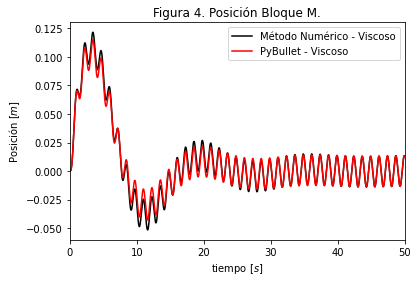

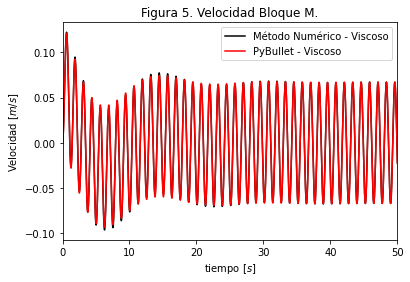

In [6]:
# @title <h3><b> Gráficas Amortiguador Viscoso

# Resolución de las EDOs
time = np.arange(0,200,0.01)      # Vector tiempo
P_A = odeint(Pdot_A, P0_A, time ) # Solucion numérica amortiguador viscoso
time_vis, x1_vis, v1_vis, F1_vis = amortiguador_viscoso(200)


# Gráfica de Posición
plt.plot(time, P_A[:,0], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis, x1_vis, '-r', label = "PyBullet - Viscoso")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 4. Posición Bloque M.")
plt.xlim([0,50])
plt.legend()
plt.show()

# Gráfica de Velocidad
plt.plot(time, P_A[:,1], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis, v1_vis, '-r', label = "PyBullet - Viscoso")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m/s]$")
plt.title("Figura 5. Velocidad Bloque M.")
plt.xlim([0,50])
plt.legend()
plt.show()

Se puede observar que tanto el método numérico (RK4) como PyBullet presentan resultados muy similares por lo que se reafirma la validez de ambos modelos, siendo el de PyBullet de especial interes, pues tanto restricciones como los cuerpos se modelan partiendo de esta base.

In [7]:
# @title <h3><b> Condición para obtener un amortiguador dinámico. Caso A: Caracteristicas invariantes </b></h5>
def condicion_amortiguador(r,m1,Omega):
  m2 = r*m1                       # r = m2/m1 (relación de masas)
  K2 = (Omega**2)*m2
  return [m2 , K2] 


$$ m_2 = rm_1 $$
$$ k' = \Omega^2k$$

Donde r es un valor numérico a iterar



<h5><b> Error de la raiz cuadratica media  </b></h3>
Para determinar los parametros se iteró el de valor $r$ y se seleccionaron los que produjeran el mejor valor de error de raiz cuadratica media o $RMSE$ por sus siglas en ingles considerando que el valor de la masa $m$ no podia superar al de $M$ para evitar incovenientes en la maquinaria a utilizarse y conociendo que:

$$ RMSE = \sqrt{\frac{\sum_{i=1}^{N}(\hat{x}-x)^2}{N}}  $$ 

Donde $N$ es el numero de elementos, $x$ es el valor conocido o estandar de nuestro fenomeno y $\hat{x}$ el valor obtenido contra el cual queremos comparar. Notese que de esta forma podemos medir que tan "parecido" es el comportamiento del amortiguador dinámico a nuestro amortiguador viscoso, la comparación se realizara para el intervalo $ 0 < t < 10 $ debido a que es de forma aproximada el intervalo en el cual se completa el primer ciclo y debido a que la ecuación del amortiguador dinámico no cuenta con terminos dependientes de la velocidad no se puede lograr un ajuste perfecto de la curva. Se esta suponiendo por tanto que se quiere que la amortiguación inicial sea lo mas parecida posible en ambos sistemas.

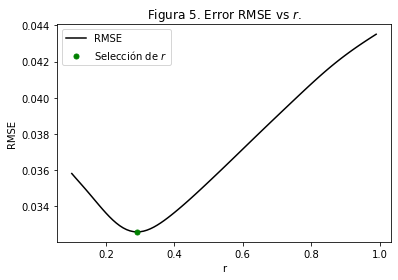

In [8]:
# @title 

def parametros_1(tmax):
  rmsd_opt = float("+inf")
  time_vis, x1_vis, v1_vis, F1_vis = amortiguador_viscoso(tmax)
  r_vec = []
  rmsd_vec = []
  for r in np.arange(0.1, 1, 0.01):
    m2, K2 = condicion_amortiguador(r,m1,Omega)  
    time, x1_din, v1_din, x2_din, v2_din = amortiguador_dinamico(m2,K2,tmax)
    dx_2 = ( np.array(x1_din) - np.array(x1_vis) )**2
    rmsd = np.sqrt( np.sum(dx_2) / len(dx_2) )

    r_vec.append(r)
    rmsd_vec.append(rmsd)

    if rmsd < rmsd_opt:
      r_opt = r
      rmsd_opt = rmsd
      m2_opt = m2
      K2_opt = K2
      time_opt = time
      x1_opt   = x1_din
      v1_opt   = v1_din
      x2_opt   = x2_din
      v2_opt   = v2_din
 
  return r_vec, rmsd_vec, r_opt, rmsd_opt
  # (Para revisar), m2_opt, K2_opt, rmsd_opt,  time_opt, x1_din, v1_din, x2_din, v2_din

r_vec1, rmsd_vec1, r1, rmsd1  = parametros_1(10)
# (Para revisar) , m2_p1, K2_p1, rmsd_p1, time_p1, x1_p1, v1_p1, x2_p1, v2_p1

# Gráfica RMSE
plt.plot(r_vec1, rmsd_vec1, '-k', label = "RMSE")
plt.plot(r1, rmsd1, 'og', markersize=5, label = "Selección de $r$")
plt.xlabel("r")
plt.ylabel("RMSE")
plt.title("Figura 5. Error RMSE vs $r$.")
plt.legend()
plt.show()

<h5> Se muestra a continuación el comportamiento del sistema para el valor de $r$ calculado:

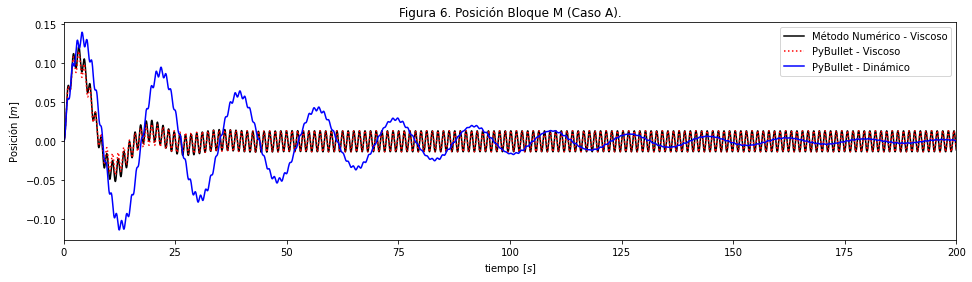

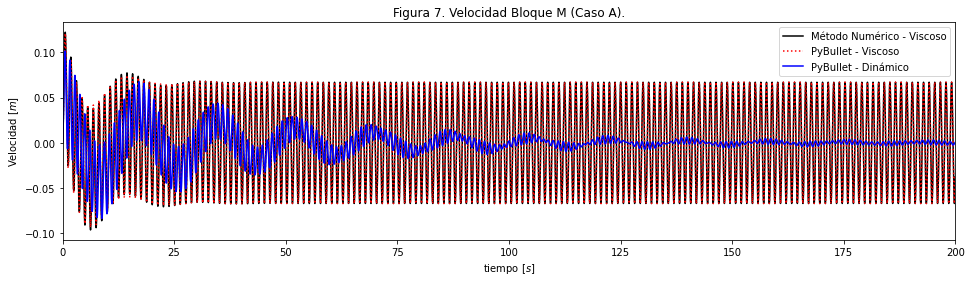

In [9]:
# @title <h5><b> Gráficas superpuestas bloque M.
m2_p1, K2_p1 = condicion_amortiguador(r1,m1,Omega) 
time_vis1, x1_vis1, v1_vis1, F1_vis1 = amortiguador_viscoso(200)
time_din1, x1_din1, v1_din1, x2_din1, v2_din1 = amortiguador_dinamico(m2_p1,K2_p1,200)

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time, P_A[:,0], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis1, x1_vis1, ':r', label = "PyBullet - Viscoso")
plt.plot(time_din1, x1_din1, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 6. Posición Bloque M (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time, P_A[:,1], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis1, v1_vis1, ':r', label = "PyBullet - Viscoso")
plt.plot(time_din1, v1_din1, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m]$")
plt.title("Figura 7. Velocidad Bloque M (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

<h5> Se puede observar que el amortiguador dinámico mimetiza el movimiento del amortiguador viscoso de manera razonable durante el primer ciclo, sin embargo el amortiguador viscoso logra atenuar mas pronunciadamente hasta alcanzar la estabilidad del sistema al bloque $M$. Es tambien importante destacar que para valores de tiempo altos el amortiguador dinámico posee amplitudes de vibración menores y mas suaves (de menor velocidad). <br>

El error absoluto fue calculado para los resultados de ambos amortiguadores utilizando PyBullet.

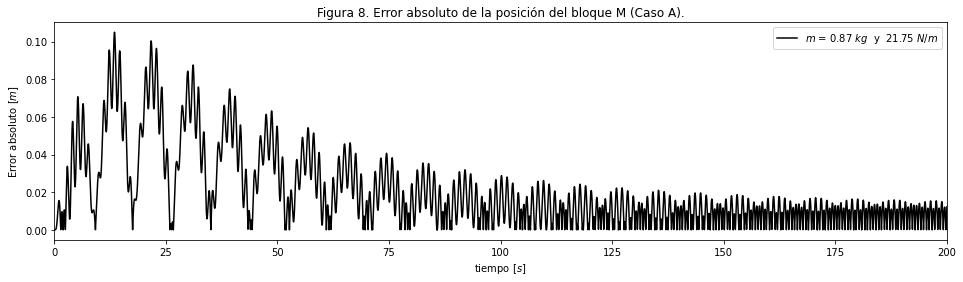

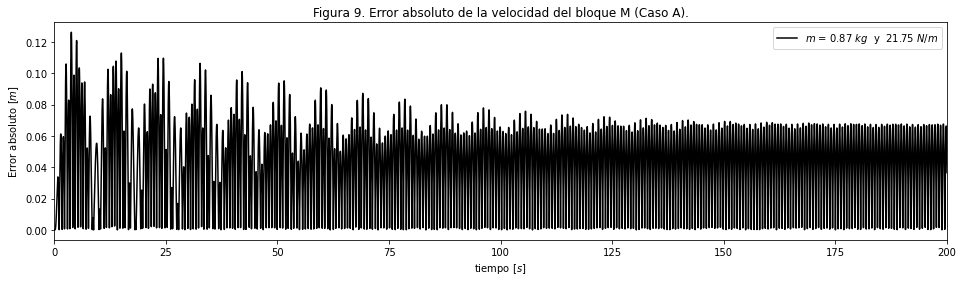

In [10]:
# @title <h5><b> Gráficas de error absoluto.
E_x1 = abs( np.array(x1_din1) - np.array(x1_vis1) )
E_v1 = abs( np.array(v1_din1) - np.array(v1_vis1) )

# Gráfica de Error Absoluto posición
plt.figure(figsize=(16, 4))
plt.plot(time_din1, E_x1, '-k', label = "$m$ = " + str(round(r1*m1,3)) + " $kg$  y  " +  str(round(K2_p1,3)) + " $N/m$")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Error absoluto $[m]$")
plt.title("Figura 8. Error absoluto de la posición del bloque M (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Error Absoluto velocidad
plt.figure(figsize=(16, 4))
plt.plot(time_din1, E_v1, '-k', label = "$m$ = " + str(round(r1*m1,3))+ " $kg$  y  " +  str(round(K2_p1,3)) + " $N/m$")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Error absoluto $[m]$")
plt.title("Figura 9. Error absoluto de la velocidad del bloque M (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

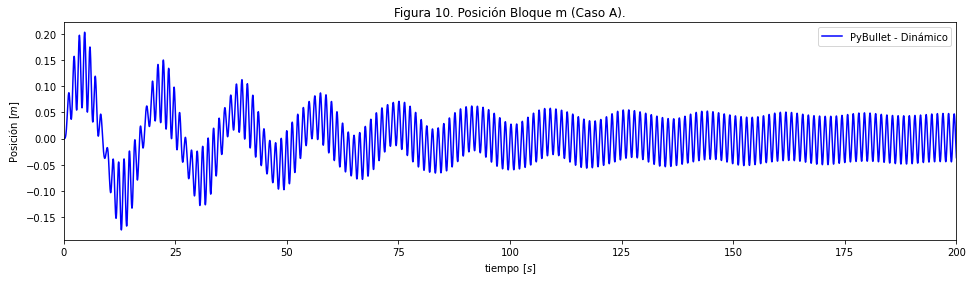

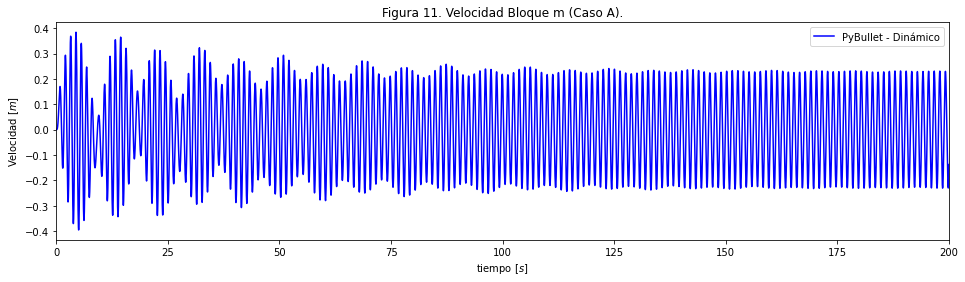

In [11]:
# @title <h5><b> Gráficas del bloque m

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time_din1, x2_din1, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 10. Posición Bloque m (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time_din1, v2_din1, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m]$")
plt.title("Figura 11. Velocidad Bloque m (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

<h5> Se logro sintonizar al amotiguador dinámico, siendo los valores encontrados $m = 0.87$ para la masa  y $k' = 21.75$ N/m la constante del resorte , bajo la consideración de que no se desea modificar las caracteristicas del sistema, puesto que bajo este supuesto el proceso  debe seguir operando de la misma forma que antes. En cuando al error absoluto, este crece para los instantes iniciales, sin llegar a tener valores muy altos que puedan causar alguna falla en el sistema original, mas aun, el error para tiempos altos tiende a disminuir por debajo de una quinta parte de su valor pico. En el supuesto que el sistema se encuentre en operación por largas jornadas de tiempo se puede ver beneficiado por la reducción en las vibraciones respecto al amortiguador viscoso. <br>

<h3><b> Caso B: Parametros Libres </b></h3>

<h5> En el caso de que no tengamos ninguna restricción de como debe comportarse el sistema, tendremos a diferencia del caso anterior, que ahora no se considera ninguna restricción respecto al valor de $k'$, por lo que se procedera de manera análoga, iterando para valores de $r$ y $k'$ y seleccionando aquella con un menor valor de $RMSE$.

In [12]:
# @title 

def parametros_2(tmax):
  rmsd_opt = float("+inf")
  time_vis, x1_vis, v1_vis, F1_vis = amortiguador_viscoso(tmax)
  r_vec = []
  rmsd_vec = []
  K2_vec = []
  for r in np.arange(0.1, 1, 0.01):
    for K2 in np.arange(0.1, 2.5, 0.1):
      m2 = r*m1
      time, x1_din, v1_din, x2_din, v2_din = amortiguador_dinamico(m2,K2,tmax)
      dx_2 = ( np.array(x1_din) - np.array(x1_vis) )**2
      rmsd = np.sqrt( np.sum(dx_2) / len(dx_2) )
      r_vec.append(r)
      rmsd_vec.append(rmsd)
      K2_vec.append(K2)

      if rmsd < rmsd_opt:
        r_opt = r
        rmsd_opt = rmsd
        m2_opt = m2
        K2_opt = K2
 
  return r_vec, rmsd_vec, K2_vec, r_opt, rmsd_opt, m2_opt, K2_opt

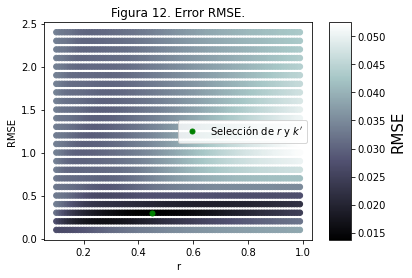

In [13]:
# @title <h5><b> Gráfica de RMSE </b><h5>
r_vec2, rmsd_vec2, K2_vec2, r2, rmsd2, m2_p2, K2_p2 = parametros_2(10)

# Gráfica RMSE
plt.scatter(r_vec2, K2_vec2, s = 30, c=rmsd_vec2, cmap = "bone")
plt.plot(r2, K2_p2, 'og', markersize=5, label = "Selección de $r$ y $k'$")
cbar = plt.colorbar(orientation="vertical", aspect=10, format="%.3f")
cbar.set_label(label="RMSE", size=15)
plt.xlabel("r")
plt.ylabel("RMSE")
plt.title("Figura 12. Error RMSE.")
plt.legend()
plt.show()

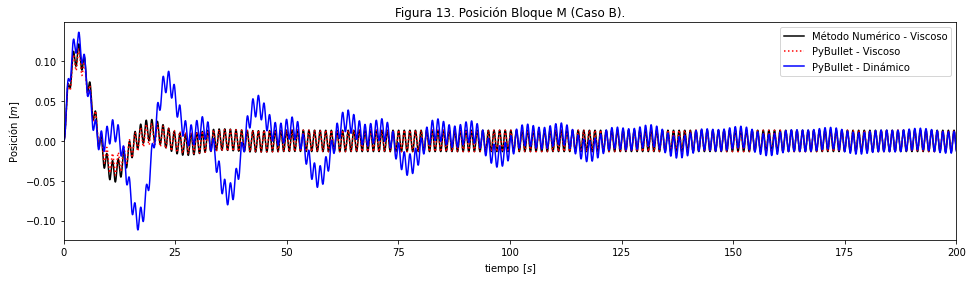

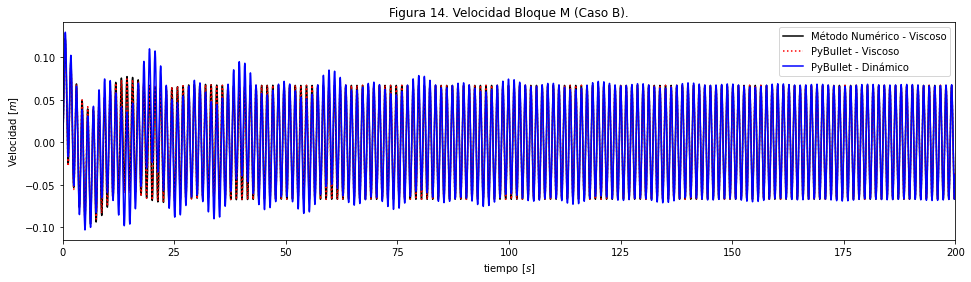

In [14]:
# @title <h5><b> Gráficas superpuestas bloque M.
time_vis2, x1_vis2, v1_vis2, F1_vis2 = amortiguador_viscoso(200)
time_din2, x1_din2, v1_din2, x2_din2, v2_din2 = amortiguador_dinamico(m2_p2,K2_p2,200)

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time, P_A[:,0], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis2, x1_vis2, ':r', label = "PyBullet - Viscoso")
plt.plot(time_din2, x1_din2, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 13. Posición Bloque M (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Velocidad
plt.figure(figsize=(16, 4))
plt.plot(time, P_A[:,1], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis2, v1_vis2, ':r', label = "PyBullet - Viscoso")
plt.plot(time_din2, v1_din2, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m]$")
plt.title("Figura 14. Velocidad Bloque M (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

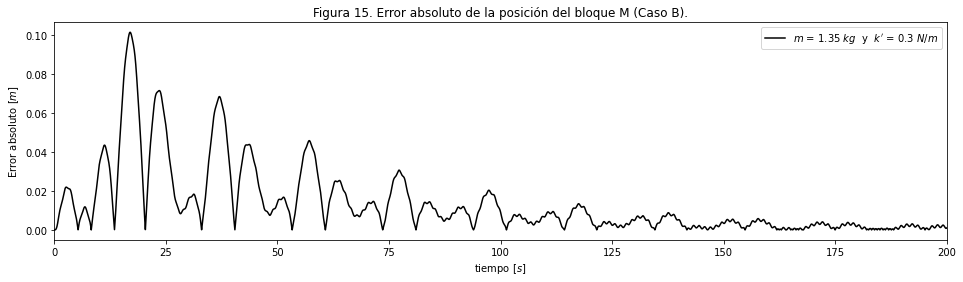

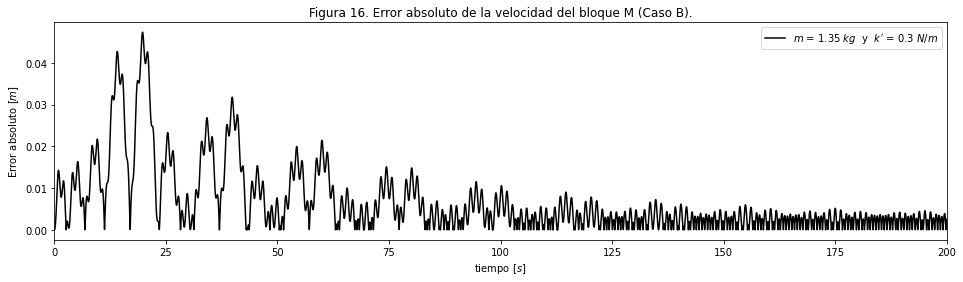

In [15]:
# @title <h5><b> Gráficas de error absoluto.
E_x2 = abs( np.array(x1_din2) - np.array(x1_vis2) )
E_v2 = abs( np.array(v1_din2) - np.array(v1_vis2) )

# Gráfica de Error Absoluto posición
plt.figure(figsize=(16, 4))
plt.plot(time_din2, E_x2, '-k', label = "$m$ = " + str(round(r2*m1,3)) + " $kg$  y  $k'$ = " +  str(round(K2_p2,3)) + " $N/m$")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Error absoluto $[m]$")
plt.title("Figura 15. Error absoluto de la posición del bloque M (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Error Absoluto velocidad
plt.figure(figsize=(16, 4))
plt.plot(time_din2, E_v2, '-k', label = "$m$ = " + str(round(r2*m1,3)) + " $kg$  y  $k'$ = " +  str(round(K2_p2,3)) + " $N/m$")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Error absoluto $[m]$")
plt.title("Figura 16. Error absoluto de la velocidad del bloque M (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

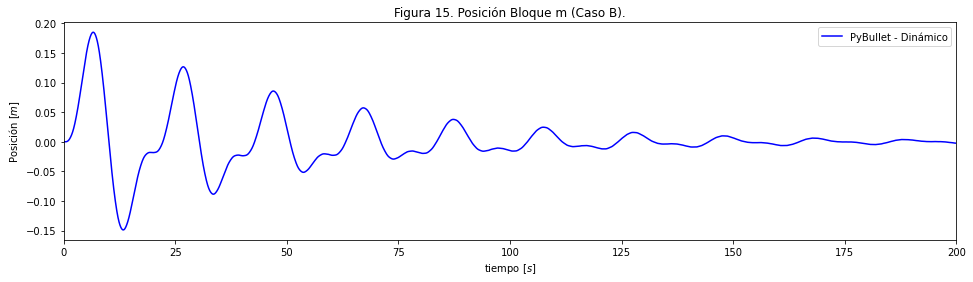

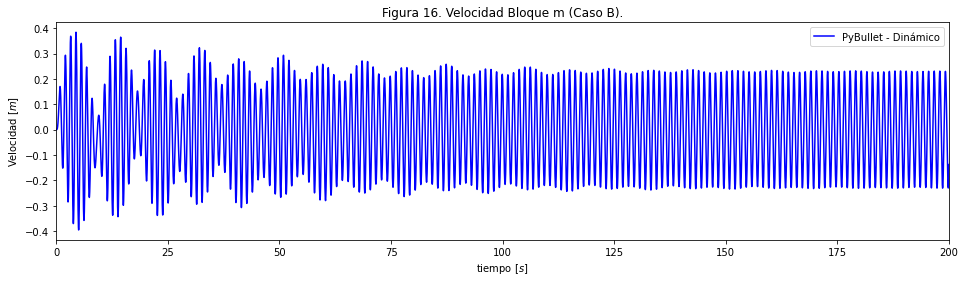

In [16]:
# @title <h5><b> Gráficas del bloque m

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time_din2, x2_din2, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 15. Posición Bloque m (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time_din1, v2_din1, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m]$")
plt.title("Figura 16. Velocidad Bloque m (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

Se seleccionaron los valores $k' = 0.3$ N/m  y  $m = 1.35$ kg debido a que presentaron el menor RMSE, como puede apreciarse en las figuras 13 y 14, estas se ajustan mas fielmente que los resultados del caso A (figuras 6 y 7) especialmente notable en el intervalo $125 < t < 200$. Asimismo la velocidad del bloque m parece estabilizarse (aunque es de esperarse que para tiempos muy grandes esta haya disminuido considerablemente. 

<h3><b> Extra

Se gráficó la respuesta ante distintos parametros, los cuales fueron calculados como los necesarios para: <br>
* Cumplir con las condiciones de la sección y se verifico cual posee menores niveles de vibración. 
* Minimizar el area entre la curva y el eje de $t$ (tiempo).
* Minimizar la amplitud máxima.



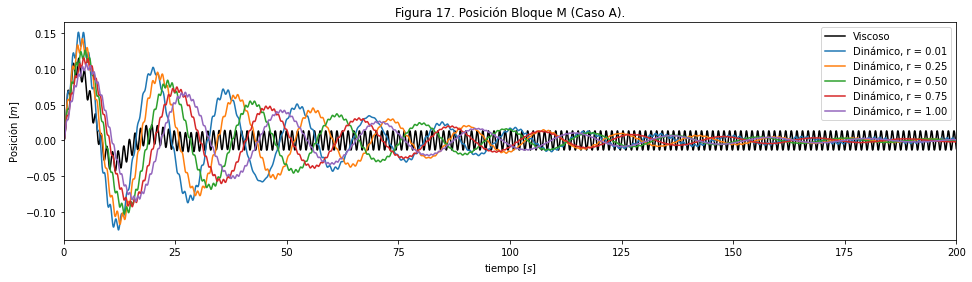

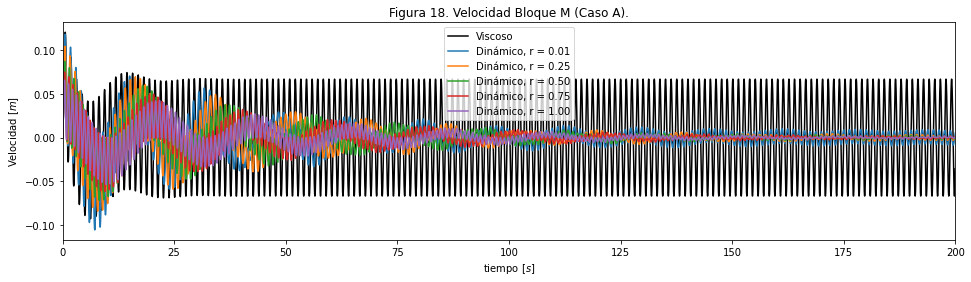

In [17]:
# @title 
m2_p41, K2_p41 = condicion_amortiguador(0.10, m1, Omega) 
m2_p42, K2_p42 = condicion_amortiguador(0.25, m1, Omega) 
m2_p43, K2_p43 = condicion_amortiguador(0.50, m1, Omega) 
m2_p44, K2_p44 = condicion_amortiguador(0.75, m1, Omega) 
m2_p45, K2_p45 = condicion_amortiguador(1.00, m1, Omega) 

time_din41, x1_din41, v1_din41, x2_din41, v2_din41 = amortiguador_dinamico(m2_p41,K2_p41,200)
time_din42, x1_din42, v1_din42, x2_din42, v2_din42 = amortiguador_dinamico(m2_p42,K2_p42,200)
time_din43, x1_din43, v1_din43, x2_din43, v2_din43 = amortiguador_dinamico(m2_p43,K2_p43,200)
time_din44, x1_din44, v1_din44, x2_din44, v2_din44 = amortiguador_dinamico(m2_p44,K2_p44,200)
time_din45, x1_din45, v1_din45, x2_din45, v2_din45 = amortiguador_dinamico(m2_p45,K2_p45,200)

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time_vis1, x1_vis1, '-k', label = "Viscoso")
plt.plot(time_din41, x1_din41, label = "Dinámico, r = 0.01" )
plt.plot(time_din41, x1_din42, label = "Dinámico, r = 0.25" )
plt.plot(time_din41, x1_din43, label = "Dinámico, r = 0.50" )
plt.plot(time_din41, x1_din44, label = "Dinámico, r = 0.75" )
plt.plot(time_din41, x1_din45, label = "Dinámico, r = 1.00" )

plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 17. Posición Bloque M (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time_vis1, v1_vis1, '-k', label = "Viscoso")
plt.plot(time_din41, v1_din41, label = "Dinámico, r = 0.01" )
plt.plot(time_din41, v1_din42, label = "Dinámico, r = 0.25" )
plt.plot(time_din41, v1_din43, label = "Dinámico, r = 0.50" )
plt.plot(time_din41, v1_din44, label = "Dinámico, r = 0.75" )
plt.plot(time_din41, v1_din45, label = "Dinámico, r = 1.00" )
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m]$")
plt.title("Figura 18. Velocidad Bloque M (Caso A).")
plt.xlim([0,200])
plt.legend()
plt.show()

Se puede observar en las figuras 17 y 18 que el nivel de vibraciones (amplitud en posición y velocidad) para todos los casos es menor en el amortiguador dinámico para pasado un cierto tiempo $t^*$. <br>
El amortiguador dinámico puede ser mejor que el viscoso debido a que el segundo alcanza en regimen permanente un nivel de vibraciones que no puede ser eliminado, mientras que el primero con el suficiente tiempo logra colocarse muy  por debajo en cuanto a vibraciones, por lo que para periodos de operacion largos tendra un mayor impacto en el mantenimiento preventivo del sistema, por otra parte son en genenal mas economicos de implementar. Por lo tanto los amortiguadores dinámicos son preferibles si no se requiere una amortiguación rapida o que se alcance cierto regimen permanente rapidamente y si la estara sometido por largos periodos de tiempo a la excitación.





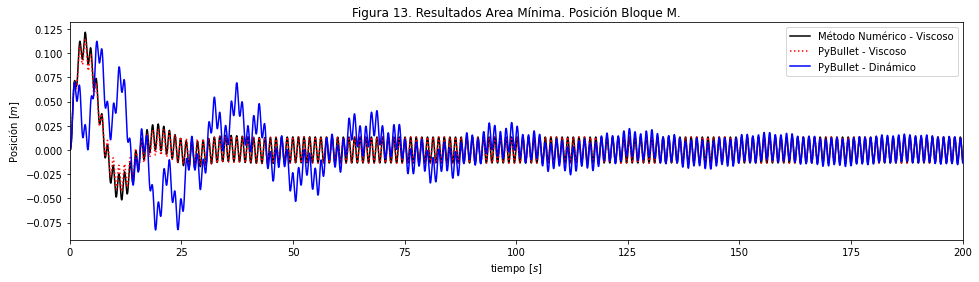

In [18]:
# @title <h5><b> Area mínima 
def extra(tmax):
  Area = float("+inf") 
  time_vis, x1_vis, v1_vis, F1_vis = amortiguador_viscoso(tmax)
  r_vec = []
  K2_vec = []

  for r in np.arange(0.1, 2.5, 0.05):
    for K2 in np.arange(0.1, 3, 0.1):
      m2 = r*m1
      time, x1_din, v1_din, x2_din, v2_din = amortiguador_dinamico(m2,K2,tmax)

      if  np.trapz( abs(np.array(x1_din)), dx = 0.01 )< Area:
        r_opt = r
        K2_opt = K2
 
  return r_vec, K2_vec, r_opt, K2_opt

r_vec3, K2_vec3, r_p3, K2_p3 = extra(10)

time_vis3, x1_vis3, v1_vis3, F1_vis3 = amortiguador_viscoso(200)
time_din3, x1_din3, v1_din3, x2_din3, v2_din3 = amortiguador_dinamico(r_p3*m1,K2_p3,200)

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time, P_A[:,0], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis3, x1_vis3, ':r', label = "PyBullet - Viscoso")
plt.plot(time_din3, x1_din3, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 13. Resultados Area Mínima. Posición Bloque M.")
plt.xlim([0,200])
plt.legend()
plt.show()

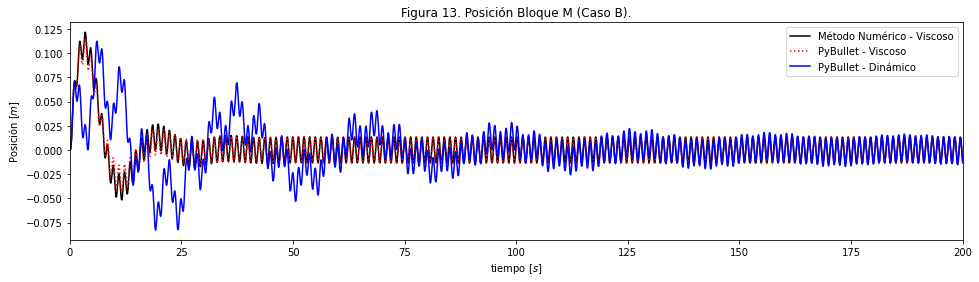

In [19]:
# @title <h5><b> Amplitud mínima
def extra(tmax):
  x_max = float("+inf")
  Area = float("+inf") 
  time_vis, x1_vis, v1_vis, F1_vis = amortiguador_viscoso(tmax)
  r_vec = []
  K2_vec = []

  for r in np.arange(0.1, 2.5, 0.05):
    for K2 in np.arange(0.1, 3, 0.1):
      m2 = r*m1
      time, x1_din, v1_din, x2_din, v2_din = amortiguador_dinamico(m2,K2,tmax)

      r_vec.append(r)
      K2_vec.append(K2)

      if  max(x1_din) < x_max:
        r_opt = r
        K2_opt = K2
 
  return r_vec, K2_vec, r_opt, K2_opt

r_vec3, K2_vec3, r_p3, K2_p3 = extra(10)  

time_vis3, x1_vis3, v1_vis3, F1_vis3 = amortiguador_viscoso(200)
time_din3, x1_din3, v1_din3, x2_din3, v2_din3 = amortiguador_dinamico(r_p3*m1,K2_p3,200)

# Gráfica de Posición
plt.figure(figsize=(16, 4))
plt.plot(time, P_A[:,0], '-k', label = "Método Numérico - Viscoso")
plt.plot(time_vis3, x1_vis3, ':r', label = "PyBullet - Viscoso")
plt.plot(time_din3, x1_din3, '-b', label = "PyBullet - Dinámico")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.title("Figura 13. Posición Bloque M (Caso B).")
plt.xlim([0,200])
plt.legend()
plt.show()

Para los casos de area minima y amplitud mínima no se obtuvieron resultados concluyentes respecto a los objetivos.

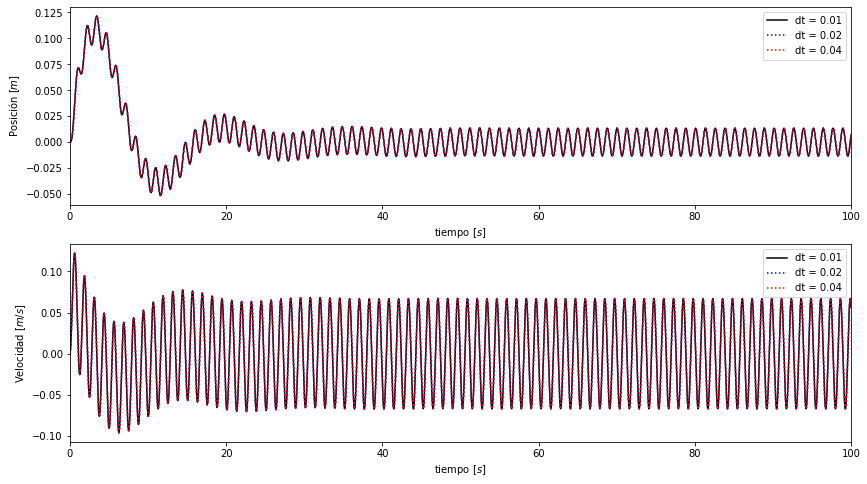

In [20]:
# @title <h5><b> Convergencia del método numérico amortiguador viscoso (Solo para verificación)</b></h5>
# Resolución de las EDOs

time1 = np.arange(0,200,0.01)      # Vector tiempo
time2 = np.arange(0,200,0.02)      # Vector tiempo
time4 = np.arange(0,200,0.04)      # Vector tiempo
P_A1 = odeint(Pdot_A, P0_A, time ) # Solucion numérica amortiguador viscoso
P_A2 = odeint(Pdot_A, P0_A, time ) # Solucion numérica amortiguador viscoso
P_A4 = odeint(Pdot_A, P0_A, time ) # Solucion numérica amortiguador viscoso

plt.figure(figsize=(14, 8))
# Gráfica de Posición
plt.subplot(2,1,1)
plt.plot(time, P_A1[:,0], '-k', label = "dt = 0.01")
plt.plot(time, P_A2[:,0], ':b', label = "dt = 0.02")
plt.plot(time, P_A4[:,0], ':r', label = "dt = 0.04")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Posición $[m]$")
plt.xlim([0,100])
plt.legend()

# Gráfica de Velocidad
plt.subplot(2,1,2)
plt.plot(time, P_A1[:,1], '-k', label = "dt = 0.01")
plt.plot(time, P_A2[:,1], ':b', label = "dt = 0.02")
plt.plot(time, P_A4[:,1], ':r', label = "dt = 0.04")
plt.xlabel("tiempo $[s]$")
plt.ylabel("Velocidad $[m/s]$")
plt.xlim([0,100])
plt.legend()
plt.show()